In [21]:
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt
from itertools import cycle

import matplotlib.pyplot as plt
import sklearn.metrics as sm
import time
 
import pandas as pd
import numpy as np

%matplotlib inline

In [22]:
data = pd.read_csv('iris_data.csv', header=1)

In [23]:
def convertToVals(X):
    myArray = []
    for x in X:
        if x == 'Iris-setosa':
            myArray.append(0)
        elif x == 'Iris-versicolor':
            myArray.append(1)
        else:
            myArray.append(2)
    return myArray

In [24]:
target = np.array(convertToVals(data.iloc[:,4:].values))

In [25]:
X = pd.DataFrame(data.iloc[:,:4].values)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']

In [26]:
y = pd.DataFrame(target)
y.columns = ['Targets']

In [27]:
# Setup Affinity Propagation
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

In [28]:
no_clusters = len(cluster_centers_indices)

In [29]:
no_clusters

3

In [30]:
cluster_centers_indices

array([ 24,  76, 100], dtype=int64)

In [31]:
xx = data.iloc[:,:4].values

Estimated number of clusters: 3


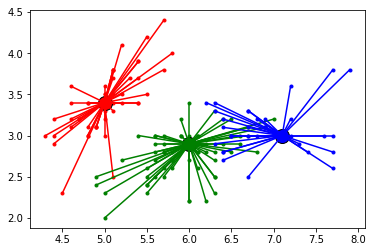

In [32]:
print('Estimated number of clusters: %d' % no_clusters)
# Plot exemplars

plt.close('all')
plt.figure(1)
plt.clf()
colors = cycle('rgby')
for k, col in zip(range(no_clusters), colors):
    class_members = labels == k
    cluster_center = xx[cluster_centers_indices[k]]
    plt.plot(xx[class_members, 0], xx[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col, markeredgecolor='k', markersize=14)
    for x in xx[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.show()

In [33]:
# Performance Metrics
sm.accuracy_score(target, predY)

0.8851351351351351

In [34]:
# The fix, we convert all the 1s to 0s and 0s to 1s.
predY = np.choose(af.labels_, [0, 1, 2]).astype(np.int64)
print (target)
print (predY)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 2 1 2 2 2 2 1 2 2 2 1 2 2
 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2 2 1]


In [35]:
# Confusion Matrix
sm.confusion_matrix(target, predY)

array([[48,  0,  0],
       [ 1, 49,  0],
       [ 0, 16, 34]], dtype=int64)

In [37]:
# Setup Affinity Propagation
start_time = time.time()
af = AffinityPropagation(convergence_iter=10, max_iter=100, preference=-500, verbose=True).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
print("--- %s seconds ---" % (time.time() - start_time))

Did not converge
--- 0.10892081260681152 seconds ---
